In [1]:
import os
import sys

In [2]:
# See: https://stackoverflow.com/questions/40845304/runtimewarning-numpy-dtype-size-changed-may-indicate-binary-incompatibility
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

In [3]:
import numpy as np
np.__version__

'1.15.0'

In [4]:
import pandas as pd
pd.__version__

'0.23.4'

In [5]:
import scipy
import scipy.fftpack
import scipy.signal
scipy.__version__

'1.1.0'

In [6]:
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.style.use('bmh')
matplotlib.__version__

'1.5.1'

# Setup the Timing Parameters and the Sampling Index

In [7]:
T = 2             # Sampling Duration (in seconds)
f_s = 8000        # Sampling rate, or number of measurements per second

NS = T * f_s      # Total number of samples

t = np.linspace(0, T, NS, endpoint=False)

# Generate a signal and add noise to it.

Basics sine wave formula:

* $y = A sin(2\pi f t + \phi) + y_0$

In [8]:
f = [10, 25, 60]  # Signal Frequency, in cycles per second, or Hertz

data = {
    's1': np.sin(f[0] * 2 * np.pi * t) + 3,
    's2': np.sin(f[1] * 2 * np.pi * t) + 0,
    's3': np.sin(f[2] * 2 * np.pi * t) + -3,
    'r': np.random.randn(t.shape[0]) * 1.2,
}

df = pd.DataFrame(index=t, data=data)

df = df.assign(x = df.s1 + df.s2 + df.s3)
df = df.assign(noisy = df.x + df.r)

df.head()

,r,s1,s2,s3,x,noisy
0.000000,-1.209026,3.000000,0.000000,-3.000000,0.000000,-1.209026
0.000125,-0.432957,3.007854,0.019634,-2.952894,0.074594,-0.358363
0.000250,-2.021031,3.015707,0.039260,-2.905892,0.149075,-1.871956
0.000375,1.039484,3.023560,0.058871,-2.859099,0.223332,1.262816
0.000500,-1.236421,3.031411,0.078459,-2.812619,0.297251,-0.939169


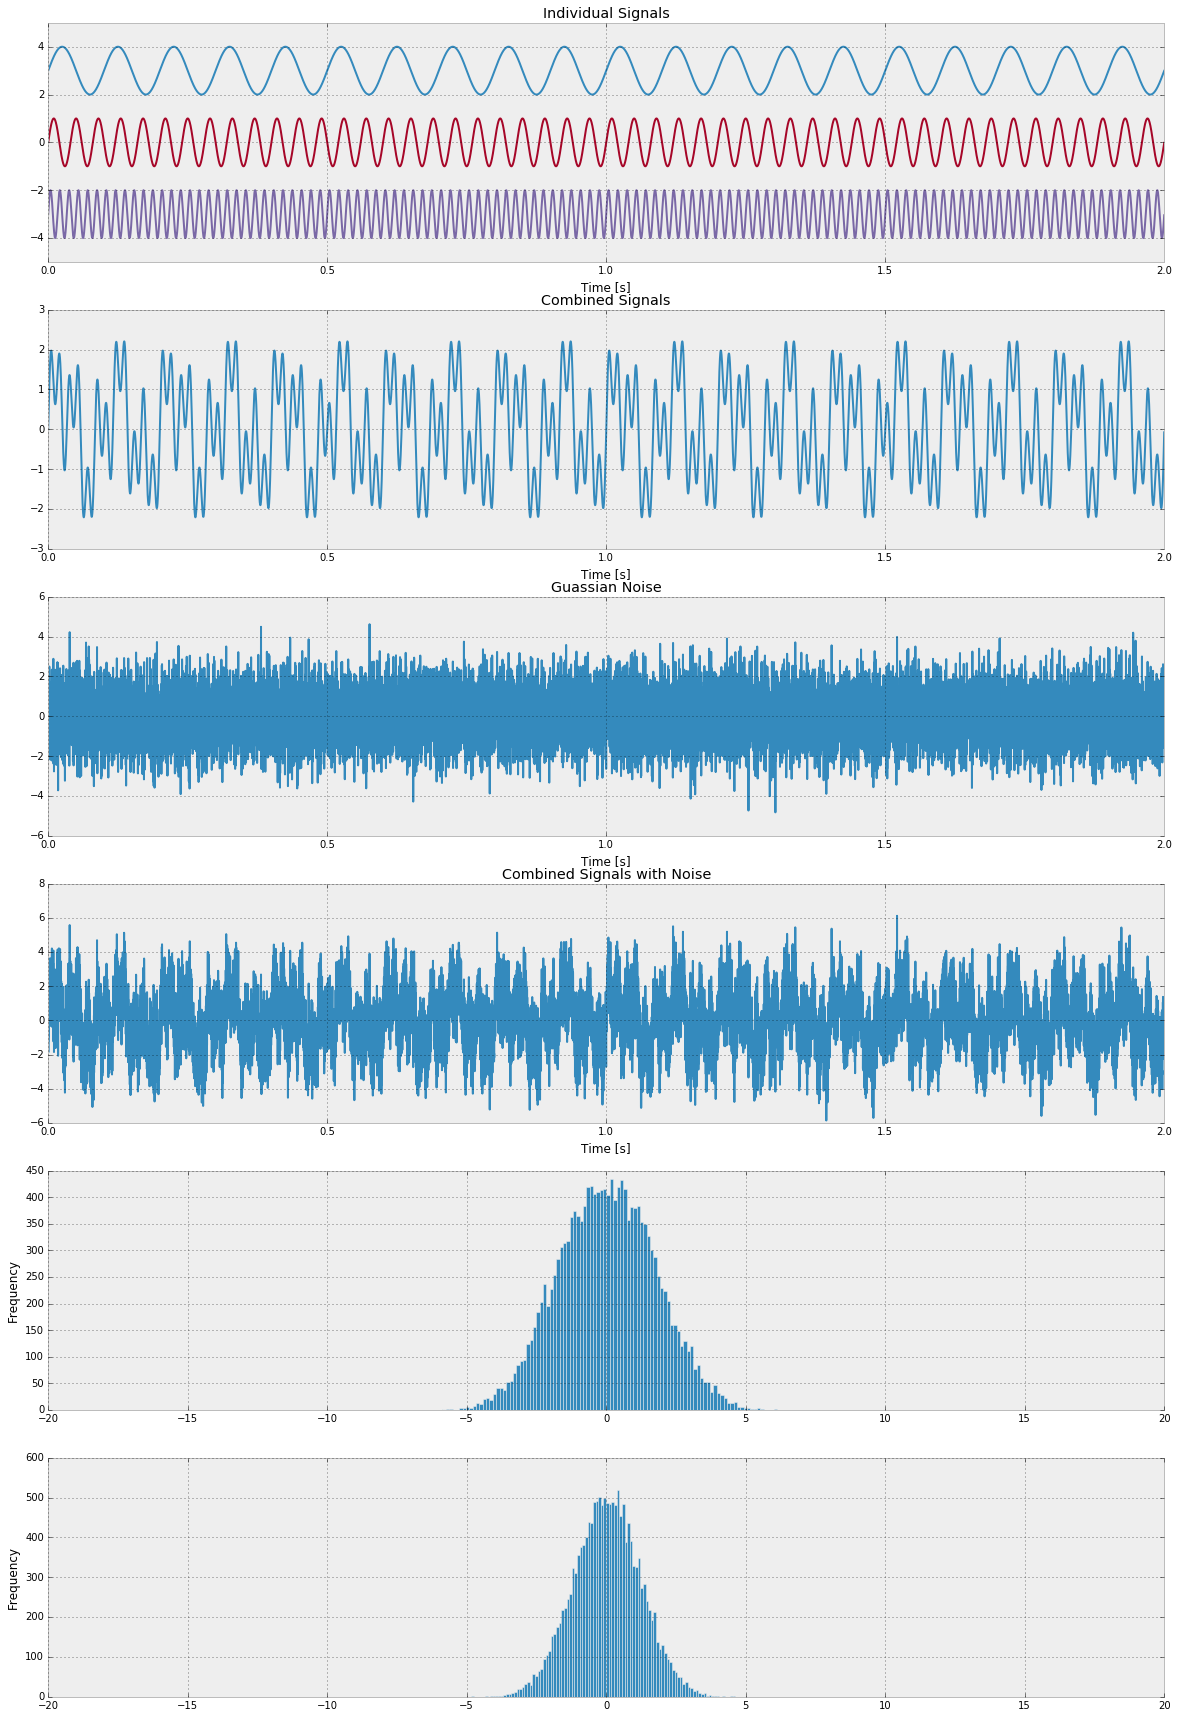

In [9]:
fig = plt.figure(figsize=(20, 30))

ax = fig.add_subplot(6,1,1)
ax.set_title('Individual Signals')
df.s1.plot(ax=ax)
df.s2.plot(ax=ax)
df.s3.plot(ax=ax)
ax.set_xlabel('Time [s]')
ax.set_ylim(-5,5)

ax = fig.add_subplot(6,1,2)
ax.set_title('Combined Signals')
df.x.plot(ax=ax)
ax.set_xlabel('Time [s]')

ax = fig.add_subplot(6,1,3)
ax.set_title('Guassian Noise')
df.r.plot(ax=ax)
ax.set_xlabel('Time [s]')
#ax.set_ylim(-5,5)

ax = fig.add_subplot(6,1,4)
ax.set_title('Combined Signals with Noise')
df.noisy.plot(ax=ax)
ax.set_xlabel('Time [s]')

ax = fig.add_subplot(6,1,5)
ax.set_xlim(-20, 20)
df.noisy.plot.hist(ax=ax, bins=100)

ax = fig.add_subplot(6,1,6)
ax.set_xlim(-20, 20)
df.r.plot.hist(ax=ax, bins=100)

# Perform spectral analysis of the noisy signal

Show that the original signal is still present in the noisy signal.

In [10]:
X = scipy.fftpack.fft(df.x)
R = scipy.fftpack.fft(df.r)
N = scipy.fftpack.fft(df.noisy)
freqs = scipy.fftpack.fftfreq(len(df.x)) * f_s

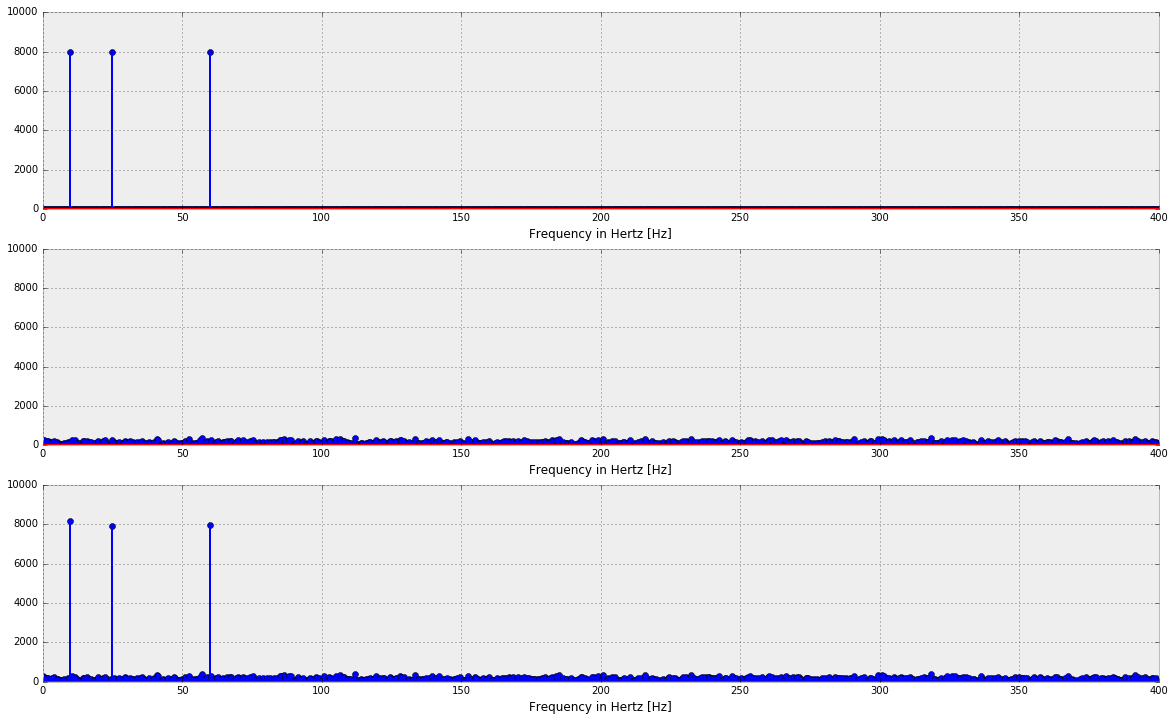

In [11]:
fig = plt.figure(figsize=(20, 12))

for i,D in enumerate([X,R,N]) :
    ax = fig.add_subplot(3,1,i+1)
    ax.stem(freqs, np.abs(D))
    ax.set_xlabel('Frequency in Hertz [Hz]')
    #ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
    ax.set_xlim(0, f_s / 20)
    ax.set_ylim(-10, 10000)

# Apply filtering to try to extract original signal.

(-2, 2)

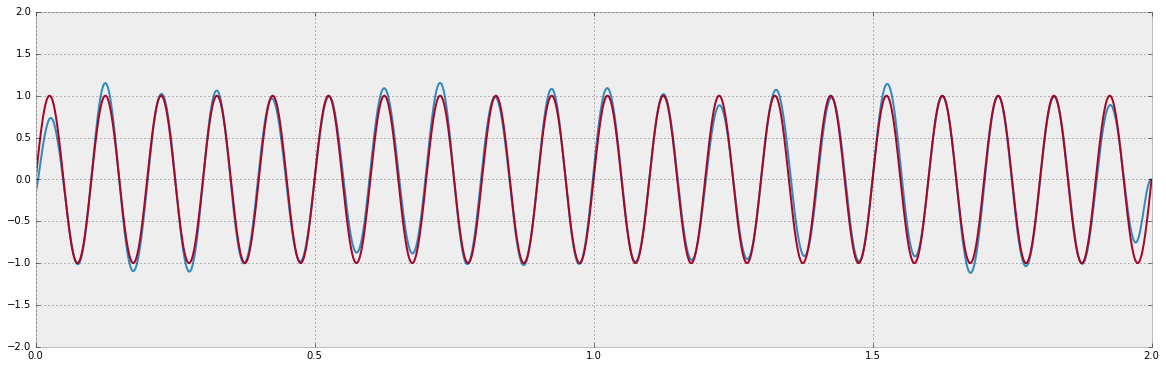

In [12]:
b, a = scipy.signal.butter(6, 15.0/(f_s / 2.0))
fn = scipy.signal.filtfilt(b, a, df.noisy, method='gust')

fig = plt.figure(figsize=(20,6))

ax = fig.add_subplot(1,1,1)
ax.plot(t, fn)
ax.plot(t, df.s1-3)
ax.set_ylim(-2, 2)

(-3, 3)

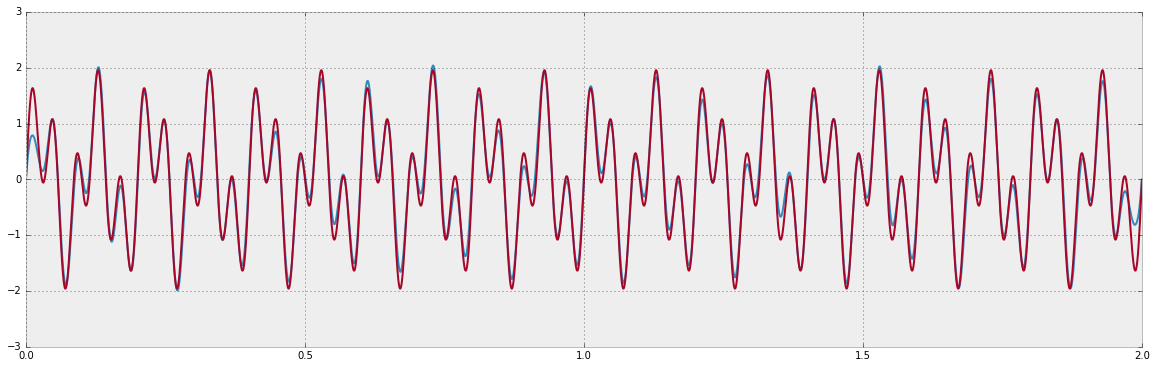

In [13]:
b, a = scipy.signal.butter(6, 30.0/(f_s / 2.0))
fn = scipy.signal.filtfilt(b, a, df.noisy, method='gust')

fig = plt.figure(figsize=(20,6))

ax = fig.add_subplot(1,1,1)
ax.plot(t, fn)
ax.plot(t, df.s1+df.s2-3)
ax.set_ylim(-3,3)